#### A simple example of price optimization

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# To prevent python from throwing up warnings
import warnings
warnings.filterwarnings('ignore') 

In [16]:
# Read in the data
df = pd.read_csv('price_strategy.csv')
print(df)

    Competitors_Price      Demand
0            5.939322  993.716473
1            7.436704  993.329599
2            6.424870  993.499055
3            5.903949  993.758589
4            4.812893  993.679768
..                ...         ...
95           2.648722  994.299717
96           6.278616  993.623798
97           1.180968  995.573726
98           8.460460  993.286717
99           1.042259  995.345089

[100 rows x 2 columns]


<Axes: xlabel='Competitors_Price', ylabel='Demand'>

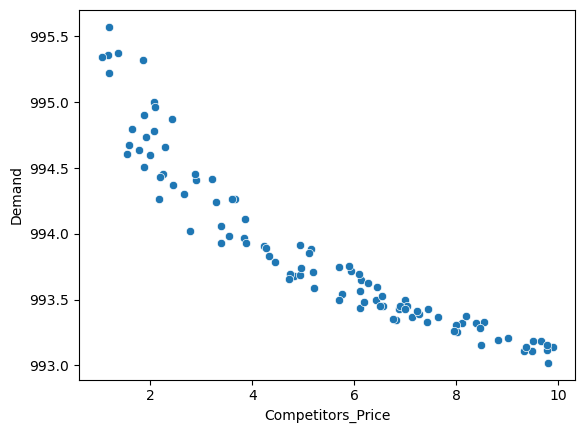

In [17]:
# Scatter plot

sns.scatterplot(df,x='Competitors_Price',y='Demand')

In [18]:
# Split data into features and label (X,y)

X = df.drop('Demand',axis=1)
y = df['Demand']

# Let us reshape y to get both dimensions
y = y.values.reshape(-1,1)

print(X.shape,y.shape)

(100, 1) (100, 1)


In [19]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [20]:
# Fit a regression model

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_train)

print(f"RMSE on training data: {np.sqrt(mean_squared_error(y_pred,y_train))}")

RMSE on training data: 0.24266269382613853


In [21]:
# Error on test data

y_test_pred = regression.predict(X_test)

print(f"RMSE on test data: {np.sqrt(mean_squared_error(y_test_pred,y_test))}")

RMSE on test data: 0.10495960540153917


In [22]:
# Generate price points for prediction
prices = np.linspace(1, 10, 100).reshape(-1, 1)

# Predict demand for the price points
predicted_demand = regression.predict(prices)



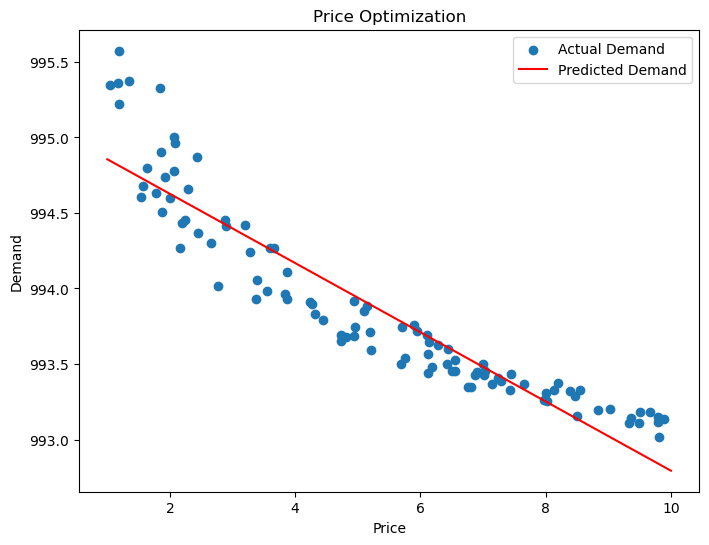

In [23]:
# Plot Visualize the price-demand relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Competitors_Price'], df['Demand'], label='Actual Demand')
plt.plot(prices, predicted_demand, color='red', label='Predicted Demand')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Price Optimization')
plt.legend()
plt.show()


### Questions to Answer ###

1. Do you feel your model generalizes well on the train and test data?

2. Looking at the line of best fit, do you think the LinearRegression model will give us the optimal strategic pricing? Explain your conclusion.

1. The RMSE error I got for the training data is relatively low and it is similar for the test data. So, I conclude the model generalizes well for my case.

2. The data seems to be non-linear and so the line of best fit does not work well for this case. For example, for the products which are in the $1 to $2 range, we are missing out on the higher demand and similarly in the $9 to $10 range. Also in the price range in between, it looks like the pricing strategy is looking to tap into the max demand available and we could be under or overpricing our product.

We shall see how to solve this problem in a better way with some of the algorthms we will learn.

The above discussion is a simplistic analysis and the real world business scenarios are more complicated. However, this exercise should give you and idea of how ML works in the domain of price optimization.

In [24]:
# Exercise 3 Solution
# Try Decison Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [25]:
# Instantiate the object
# Let us assume max depth = 3
dt = DecisionTreeRegressor(max_depth=3)

dt.fit(X_train,y_train)

dt_pred = dt.predict(prices)

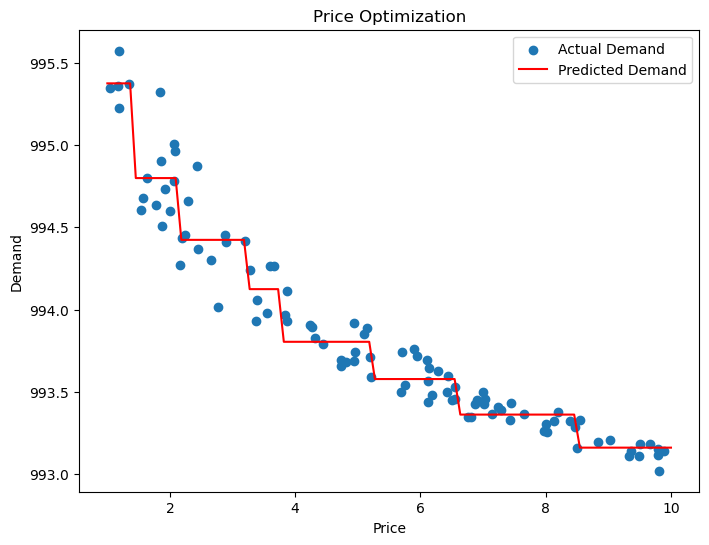

In [26]:
# Plot Visualize the price-demand relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Competitors_Price'], df['Demand'], label='Actual Demand')
plt.plot(prices, dt_pred, color='red', label='Predicted Demand')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Price Optimization')
plt.legend()
plt.show()

And you can see that the Decision Tree, being a non-linear classifier, gives a much better fit and makes it easier for the business to decide on strategic pricing.

#### Plot Tree ####

In [27]:
from sklearn.tree import plot_tree

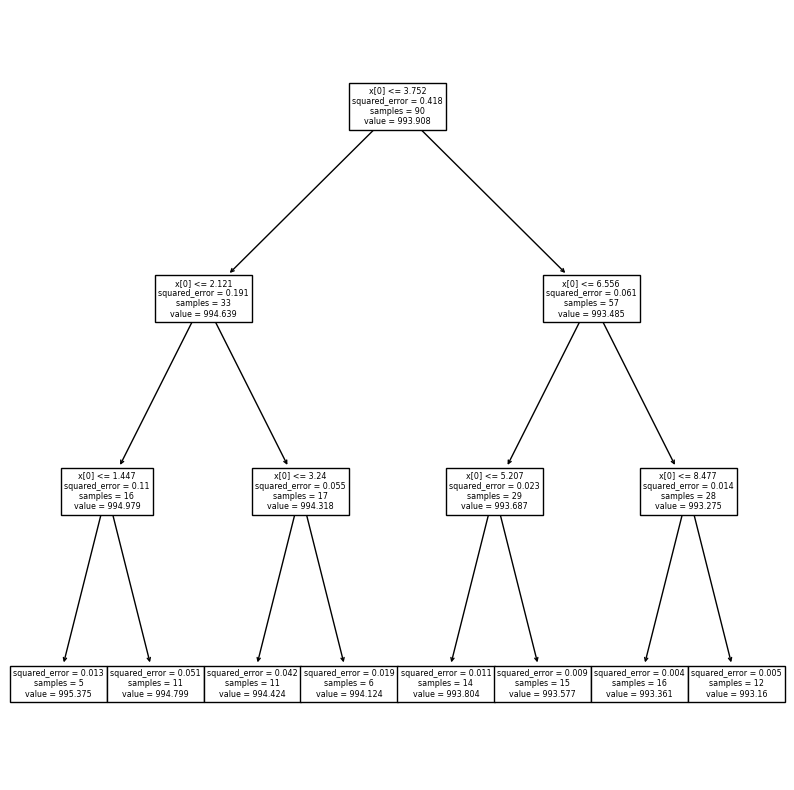

In [28]:
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()